In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
#define a custom dataset
X=reviews = [
    "The movie was absolutely fantastic and heartwarming.",
    "I really enjoyed the plot and the acting was superb.",
    "One of the worst films I’ve seen in years.",
    "The storyline was dull and completely predictable.",
    "A brilliant performance by the lead actor.",
    "I wouldn't recommend this movie to anyone.",
    "The visuals and soundtrack were truly amazing.",
    "It felt like a waste of time with no real plot.",
    "The ending was unexpected and very satisfying.",
    "Terrible dialogue and poor direction throughout."
]
y=labels = [
    "positive",
    "positive",
    "negative",
    "negative",
    "positive",
    "negative",
    "positive",
    "negative",
    "positive",
    "negative"
]


In [4]:
tokenizer=Tokenizer(oov_token='UNK')
#out of vocabulary token ie not present in Train data
#in Test dataset replace all oov words with 'UNK'

In [5]:
tokenizer.fit_on_texts(X)

In [6]:
tokenizer.word_index

{'UNK': 1,
 'the': 2,
 'and': 3,
 'was': 4,
 'movie': 5,
 'i': 6,
 'plot': 7,
 'of': 8,
 'a': 9,
 'absolutely': 10,
 'fantastic': 11,
 'heartwarming': 12,
 'really': 13,
 'enjoyed': 14,
 'acting': 15,
 'superb': 16,
 'one': 17,
 'worst': 18,
 'films': 19,
 'i’ve': 20,
 'seen': 21,
 'in': 22,
 'years': 23,
 'storyline': 24,
 'dull': 25,
 'completely': 26,
 'predictable': 27,
 'brilliant': 28,
 'performance': 29,
 'by': 30,
 'lead': 31,
 'actor': 32,
 "wouldn't": 33,
 'recommend': 34,
 'this': 35,
 'to': 36,
 'anyone': 37,
 'visuals': 38,
 'soundtrack': 39,
 'were': 40,
 'truly': 41,
 'amazing': 42,
 'it': 43,
 'felt': 44,
 'like': 45,
 'waste': 46,
 'time': 47,
 'with': 48,
 'no': 49,
 'real': 50,
 'ending': 51,
 'unexpected': 52,
 'very': 53,
 'satisfying': 54,
 'terrible': 55,
 'dialogue': 56,
 'poor': 57,
 'direction': 58,
 'throughout': 59}

In [7]:
tokenizer.word_counts

OrderedDict([('the', 8),
             ('movie', 2),
             ('was', 4),
             ('absolutely', 1),
             ('fantastic', 1),
             ('and', 6),
             ('heartwarming', 1),
             ('i', 2),
             ('really', 1),
             ('enjoyed', 1),
             ('plot', 2),
             ('acting', 1),
             ('superb', 1),
             ('one', 1),
             ('of', 2),
             ('worst', 1),
             ('films', 1),
             ('i’ve', 1),
             ('seen', 1),
             ('in', 1),
             ('years', 1),
             ('storyline', 1),
             ('dull', 1),
             ('completely', 1),
             ('predictable', 1),
             ('a', 2),
             ('brilliant', 1),
             ('performance', 1),
             ('by', 1),
             ('lead', 1),
             ('actor', 1),
             ("wouldn't", 1),
             ('recommend', 1),
             ('this', 1),
             ('to', 1),
             ('anyone', 1),
        

In [8]:
seq=tokenizer.texts_to_sequences(X)

In [9]:
seq

[[2, 5, 4, 10, 11, 3, 12],
 [6, 13, 14, 2, 7, 3, 2, 15, 4, 16],
 [17, 8, 2, 18, 19, 20, 21, 22, 23],
 [2, 24, 4, 25, 3, 26, 27],
 [9, 28, 29, 30, 2, 31, 32],
 [6, 33, 34, 35, 5, 36, 37],
 [2, 38, 3, 39, 40, 41, 42],
 [43, 44, 45, 9, 46, 8, 47, 48, 49, 50, 7],
 [2, 51, 4, 52, 3, 53, 54],
 [55, 56, 3, 57, 58, 59]]

In [10]:
seq=pad_sequences(seq,padding='post')

In [11]:
seq #max encoded integer = 59; hence there are 59 words
#0 is padded to make sentences equal length

array([[ 2,  5,  4, 10, 11,  3, 12,  0,  0,  0,  0],
       [ 6, 13, 14,  2,  7,  3,  2, 15,  4, 16,  0],
       [17,  8,  2, 18, 19, 20, 21, 22, 23,  0,  0],
       [ 2, 24,  4, 25,  3, 26, 27,  0,  0,  0,  0],
       [ 9, 28, 29, 30,  2, 31, 32,  0,  0,  0,  0],
       [ 6, 33, 34, 35,  5, 36, 37,  0,  0,  0,  0],
       [ 2, 38,  3, 39, 40, 41, 42,  0,  0,  0,  0],
       [43, 44, 45,  9, 46,  8, 47, 48, 49, 50,  7],
       [ 2, 51,  4, 52,  3, 53, 54,  0,  0,  0,  0],
       [55, 56,  3, 57, 58, 59,  0,  0,  0,  0,  0]])

In [12]:
seq.shape

(10, 11)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
X_train, X_test,y_train, y_test=train_test_split(seq,y,test_size=0.3, random_state=22)

In [66]:
seq

array([[ 2,  5,  4, 10, 11,  3, 12,  0,  0,  0,  0],
       [ 6, 13, 14,  2,  7,  3,  2, 15,  4, 16,  0],
       [17,  8,  2, 18, 19, 20, 21, 22, 23,  0,  0],
       [ 2, 24,  4, 25,  3, 26, 27,  0,  0,  0,  0],
       [ 9, 28, 29, 30,  2, 31, 32,  0,  0,  0,  0],
       [ 6, 33, 34, 35,  5, 36, 37,  0,  0,  0,  0],
       [ 2, 38,  3, 39, 40, 41, 42,  0,  0,  0,  0],
       [43, 44, 45,  9, 46,  8, 47, 48, 49, 50,  7],
       [ 2, 51,  4, 52,  3, 53, 54,  0,  0,  0,  0],
       [55, 56,  3, 57, 58, 59,  0,  0,  0,  0,  0]])

In [65]:
import numpy as np
print(np.max(seq))  # Should be < vocab_size
#Input layer neurons count = vocab_size + 1=59 + 1 = 60

59


In [61]:
# defining the RNN model with Embedding layer
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout, Input
# Build Model
model_lstm = models.Sequential([
Embedding(input_dim=60,output_dim=2),#,input_length=11),
LSTM(64, activation='relu', return_sequences=False), # Input shape, and LSTM layer with 32 units
#return_sequences is set false as we are interested in the output at last time step only
Dense(128, activation='relu'), #Fully connected layer
Dense(2, activation='softmax') # Output layer positive/negative
])

In [62]:
model_lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
y_train

array([1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [38]:
model_lstm.compile(
    loss='sparse_categorical_crossentropy',       # correct loss for 0/1 labels
    optimizer='adam',
    metrics=['accuracy']              # accuracy
)


In [39]:
X_test

array([[17,  8,  2, 18, 19, 20, 21, 22, 23,  0,  0],
       [ 6, 13, 14,  2,  7,  3,  2, 15,  4, 16,  0],
       [55, 56,  3, 57, 58, 59,  0,  0,  0,  0,  0]])

In [20]:
#just to check shape of output dense vectors
#try prediction on test data without Training
#from a model with random initial weights
#As Test data has just 3 sentences
#it returns 2 output values corresponding to each word 
#in 3 Test reviews
pred=model_lstm.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


In [21]:
pred

array([[0.50134844, 0.49865153],
       [0.50157666, 0.49842328],
       [0.5020301 , 0.49796996]], dtype=float32)

In [22]:
print(X_train.shape)
print(X_test.shape)

(7, 11)
(3, 11)


In [23]:
print(y_train.shape)
print(y_test.shape)

(7,)
(3,)


In [51]:
#now let's train
history=model_lstm.fit(X_train,y_train,epochs=70, validation_data=(X_test,y_test))

Epoch 1/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 0.3333 - val_loss: 2.6906
Epoch 2/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 0.3333 - val_loss: 2.6974
Epoch 3/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 0.3333 - val_loss: 2.7000
Epoch 4/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.3333 - val_loss: 2.7040
Epoch 5/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 0.3333 - val_loss: 2.7136
Epoch 6/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.3333 - val_loss: 2.7459
Epoch 7/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.3333 - val_loss: 2.8153
Epoch 8/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.3333 - val_loss: 2.9283


In [56]:
#utilising Early stopping
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',   # or 'val_loss' depending on what you care about
    patience=30,           # number of epochs to wait after no improvement
    restore_best_weights=True
)

history = model_lstm.fit(
    X_train, y_train,
    epochs=80,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


Epoch 1/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 5.2793e-07 - val_accuracy: 0.3333 - val_loss: 6.7224
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 5.2793e-07 - val_accuracy: 0.3333 - val_loss: 6.7267
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 5.1090e-07 - val_accuracy: 0.3333 - val_loss: 6.7309
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 5.1090e-07 - val_accuracy: 0.3333 - val_loss: 6.7349
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 5.1090e-07 - val_accuracy: 0.3333 - val_loss: 6.7388
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 5.1090e-07 - val_accuracy: 0.3333 - val_loss: 6.7425
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 5.1090e-07 - val_accuracy: 0.3333 - val_loss: 6.7462
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 5.1090e-07 - val_accu

In [57]:
pred=model_lstm.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [58]:
pred

array([[9.9996138e-01, 3.8566726e-05],
       [9.9996555e-01, 3.4474138e-05],
       [5.0591618e-05, 9.9994946e-01]], dtype=float32)

In [59]:
history_df = pd.DataFrame(history.history)
print(history_df.head())


   accuracy          loss  val_accuracy  val_loss
0       1.0  5.279263e-07      0.333333  6.722355
1       1.0  5.279263e-07      0.333333  6.726688
2       1.0  5.108964e-07      0.333333  6.730856
3       1.0  5.108964e-07      0.333333  6.734880
4       1.0  5.108964e-07      0.333333  6.738773


In [55]:
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 11, 2)          │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,552 (302.94 KB)

 Trainable params: 25,850 (100.98 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,702 (201.96 KB)

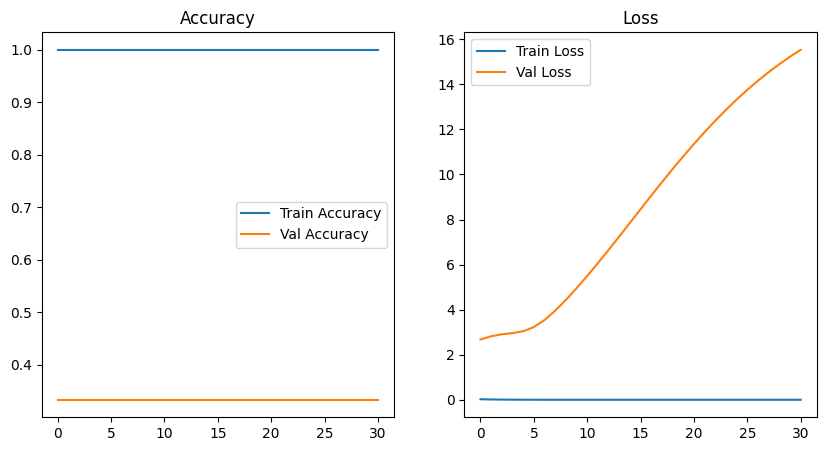

In [46]:
import matplotlib.pyplot as plt
# Plot Accuracy & Loss
plt.figure(figsize=(10,5))
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
#to extract Dense embedding outcome of this model
embedding_layer = model_lstm.layers[0]  
# first layer is the Embedding layer

In [ ]:
#weights of layers 0 are vectors of size 2 for each word
embedding_weights = embedding_layer.get_weights()[0]  # shape will be (60, 2)

In [67]:
embedding_weights.shape

(60, 2)

In [68]:
embedding_weights

array([[ 0.07683533, -0.0743304 ],
       [-0.02049006, -0.01087557],
       [ 0.01368325, -0.01381708],
       [ 0.05679191,  0.00925899],
       [ 0.02030338,  0.02498595],
       [-0.0333598 , -0.0347733 ],
       [-0.05254186,  0.05221553],
       [-0.02186526,  0.05949368],
       [-0.08909563,  0.01815683],
       [-0.01484035,  0.02270982],
       [ 0.08398816, -0.09211831],
       [ 0.04356154, -0.05919483],
       [ 0.02573724, -0.08491055],
       [ 0.04776177,  0.00938874],
       [-0.01207012, -0.04387641],
       [ 0.02184692, -0.03922284],
       [ 0.03574378, -0.03598032],
       [ 0.04474194,  0.00894104],
       [ 0.01130908, -0.00352001],
       [-0.04652399,  0.01211288],
       [-0.00592209,  0.01305426],
       [-0.04433573, -0.00692034],
       [ 0.04956547,  0.0082943 ],
       [ 0.02101246, -0.02424296],
       [-0.10809289,  0.03515143],
       [-0.05922418,  0.05763666],
       [-0.09191186,  0.01594621],
       [-0.03175644,  0.04002782],
       [ 0.06066514,